In [93]:
# Import necessary libraries
import pandas as pd
import numpy as np
from tensorflow import*
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mediapipe as mp
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [94]:
# Load the CSV file
df = pd.read_csv("C:\\Users\\soura\\Downloads\\combined_output.csv")

In [95]:
# Extract features and labels
X = df.iloc[:, 1:-1].values  # Keypoints columns
y = df.iloc[:, -1].values  # Labels column

In [96]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [97]:
# Save label encoder classes
np.save('label_encoder_classes.npy', label_encoder.classes_)

In [98]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=100)

In [99]:
# Reshape data to fit the CNN model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [100]:
# Define the CNN model with additional dense layers
# model = Sequential()
# model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(128, kernel_size=3, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))  # Additional dense layer
# model.add(Dense(32, activation='relu'))  # Additional dense layer
# model.add(Dropout(0.5))
# model.add(Dense(len(label_encoder.classes_), activation='softmax'))

In [107]:
# # Define the CNN model
model = Sequential()
model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))



# # Define the CNN model
# model = Sequential()
# model.add(Conv1D(64, kernel_size=4, activation='relu', input_shape=(X_train.shape[1], 1)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(128, kernel_size=3, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
# model.add(Dropout(0.3))
# model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.02)))
# model.add(Dropout(0.3))
# model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.02)))
# model.add(Dropout(0.3))
# model.add(Dense(len(label_encoder.classes_), activation='softmax'))

c:\Users\soura\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.0483 - loss: 3.3226 - val_accuracy: 0.0290 - val_loss: 3.3313
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0645 - loss: 3.2589 - val_accuracy: 0.0870 - val_loss: 3.2952
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0720 - loss: 3.2504 - val_accuracy: 0.0483 - val_loss: 3.2647
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0594 - loss: 3.2160 - val_accuracy: 0.0773 - val_loss: 3.2084
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0859 - loss: 3.1243 - val_accuracy: 0.1111 - val_loss: 3.1094
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1251 - loss: 3.0017 - val_accuracy: 0.1498 - val_loss: 2.8493
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1699 - loss: 2.8228 - val_accuracy: 0.1787 - val_loss: 2.6761
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2290 - loss: 2.5720 - val_accuracy: 0.

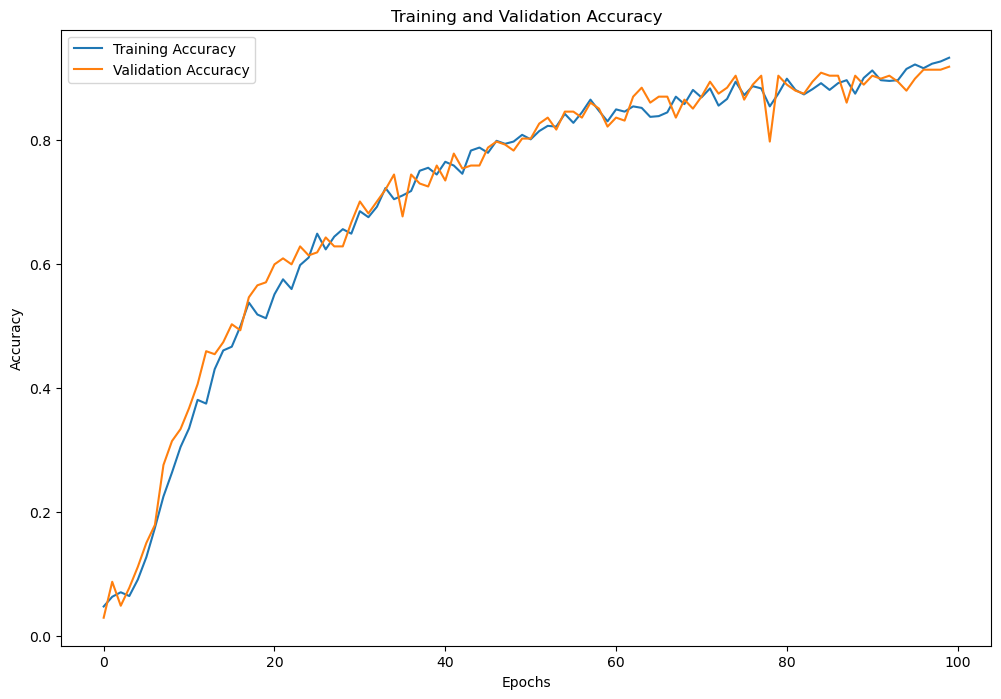

In [109]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=63, validation_data=(X_test, y_test), callbacks= early_stopping)

plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [110]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9330 - loss: 0.1412 
Test accuracy: 0.9178743958473206


In [111]:
# Save the model
model.save('sign_language_model.keras')

In [112]:
# Function to predict sign language word from keypoints
def predict_sign_language(keypoints):
    keypoints = np.array(keypoints).reshape(1, len(keypoints), 1)
    prediction = model.predict(keypoints)
    label_index = np.argmax(prediction)
    return label_encoder.inverse_transform([label_index])[0]

# Example prediction
example_keypoints = X_test[0].flatten()
predicted_label = predict_sign_language(example_keypoints)
print(f'Predicted label: {predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted label: 7
